# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
counter = len(cities)
len(cities)

584

In [ ]:
#{cities.index(city)}.head


In [13]:
#Dataframe of information
city_df = pd.DataFrame(cities)
city_df['City']=pd.DataFrame(city_df[0])
del city_df[0]
city_df.head()

,City
0,illoqqortoormiut
1,tiksi
2,albany
3,alpena
4,luderitz


In [ ]:
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}

In [30]:
# Create Columns to Store Data
city_df['Cloudiness'] = ""
city_df['Country'] = ""
city_df['Date'] = ""
city_df['Humidity'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Wind Speed'] = ""
city_df.head()

# URL that you will call from
url = "http://api.openweathermap.org/data/2.5/weather?"

# Explanation to User
print("-----------------------------")
print("Starting Weather Gathering")
print("-----------------------------")

# Start the loop to fill in DF
for index, row in city_df.iterrows():
    city = row['City']

    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"

    weather_response = requests.get(query_url)
    weather_response = weather_response.json()
    
#   print(weather_response)
#   break
# Conditional Statement so loop will not break if data is missing
    try:
        print(f"Processing city {index} of {counter} | {city}")
        city_df.loc[index, "Lat"] = weather_response["coord"]["lat"]
        city_df.loc[index, "Lng"] = weather_response["coord"]["lon"]
        city_df.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        city_df.loc[index, "Country"] = weather_response["sys"]["country"]
        city_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        city_df.loc[index, "Max Temp"] = weather_response["main"]["temp_max"]
        city_df.loc[index, "Wind Speed"] = weather_response["wind"]["speed"]
#        city_df.loc[index, "Cloudiness"] = weather_response["weather"][0]["description"]
    except (KeyError, IndexError):
        print("City not found... skipping.")

print("-----------------------------")
print("  Data Retrevial Complete")
print("-----------------------------")




-----------------------------
Starting Weather Gathering
-----------------------------
Processing city 1 of 584 | tiksi
Processing city 2 of 584 | albany
Processing city 3 of 584 | alpena
Processing city 4 of 584 | luderitz
Processing city 5 of 584 | diamantino
Processing city 6 of 584 | bethel
Processing city 7 of 584 | los llanos de aridane
Processing city 8 of 584 | kaitangata
Processing city 9 of 584 | san patricio
Processing city 10 of 584 | ous
Processing city 11 of 584 | cairns
Processing city 12 of 584 | ribeira grande
Processing city 13 of 584 | new norfolk
Processing city 14 of 584 | bowen
Processing city 16 of 584 | vitry-le-francois
Processing city 17 of 584 | barrow
Processing city 18 of 584 | butaritari
Processing city 19 of 584 | rikitea
Processing city 21 of 584 | hobart
Processing city 22 of 584 | eureka
Processing city 23 of 584 | victoria
Processing city 24 of 584 | punta arenas
Processing city 26 of 584 | ushuaia
Processing city 27 of 584 | arraial do cabo
Processin

Processing city 239 of 584 | boddam
Processing city 240 of 584 | beloha
Processing city 241 of 584 | cidreira
Processing city 242 of 584 | krasnyy oktyabr
Processing city 243 of 584 | devgarh
Processing city 244 of 584 | monrovia
Processing city 245 of 584 | brcko
Processing city 246 of 584 | airai
Processing city 247 of 584 | tagusao
Processing city 248 of 584 | puerto escondido
Processing city 249 of 584 | arlit
Processing city 250 of 584 | soldotna
Processing city 251 of 584 | itarema
Processing city 252 of 584 | newport
Processing city 253 of 584 | sakaiminato
Processing city 254 of 584 | shimoda
Processing city 255 of 584 | svetlogorsk
Processing city 256 of 584 | clifton springs
Processing city 257 of 584 | provideniya
Processing city 258 of 584 | aguimes
Processing city 259 of 584 | sarankhola
Processing city 260 of 584 | sibu
Processing city 261 of 584 | altay
Processing city 262 of 584 | yulara
Processing city 263 of 584 | pabrade
Processing city 264 of 584 | dawson creek
Proc

Processing city 486 of 584 | kupang
Processing city 487 of 584 | chisec
Processing city 488 of 584 | gazojak
Processing city 489 of 584 | bejar
Processing city 491 of 584 | havelock
Processing city 492 of 584 | jiangyou
Processing city 493 of 584 | tazmalt
Processing city 494 of 584 | veraval
Processing city 495 of 584 | naryan-mar
Processing city 496 of 584 | acapulco
Processing city 497 of 584 | aswan
Processing city 498 of 584 | kiama
Processing city 499 of 584 | agua dulce
Processing city 500 of 584 | porbandar
Processing city 501 of 584 | yumen
Processing city 502 of 584 | birao
Processing city 503 of 584 | pochutla
Processing city 504 of 584 | mantiquil
Processing city 505 of 584 | peabody
Processing city 506 of 584 | chignahuapan
Processing city 507 of 584 | mukhen
Processing city 508 of 584 | glen allen
Processing city 509 of 584 | rawson
Processing city 510 of 584 | iralaya
Processing city 511 of 584 | san juan
Processing city 512 of 584 | riacho de santana
Processing city 513

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
#Clean data
city_df = city_df[city_df['Cloudiness'] != ""]
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
city_df.to_csv("cities.csv", encoding="utf-8", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Check Data
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,tiksi,100,RU,1573169571,97,71.64,128.87,-5.89,5.35
2,albany,90,US,1573169340,86,42.65,-73.75,39.99,11.41
3,alpena,90,US,1573169571,74,45.06,-83.43,28.99,4.7
4,luderitz,32,NA,1573169571,63,-26.65,15.16,60.8,12.75
5,diamantino,100,BR,1573169571,88,-14.4,-56.44,74.61,3.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

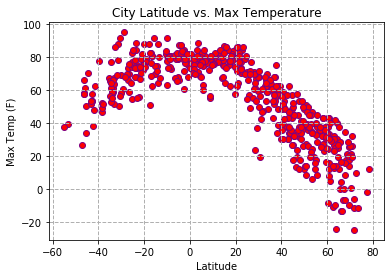

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolor='purple', color='red')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('temp.png')

#### Latitude vs. Humidity Plot

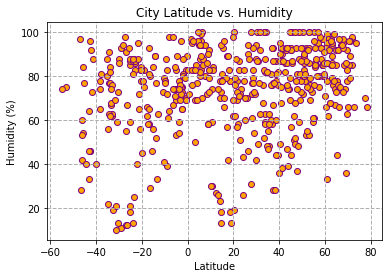

<Figure size 432x288 with 0 Axes>

In [34]:
plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolor='purple', color='orange')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('humid.png')

#### Latitude vs. Cloudiness Plot

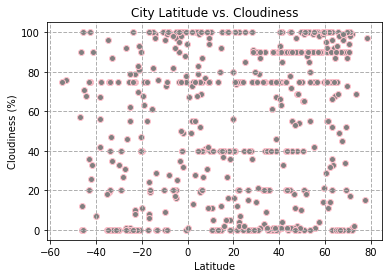

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], edgecolor='pink', color='grey')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('cloud.png')

#### Latitude vs. Wind Speed Plot

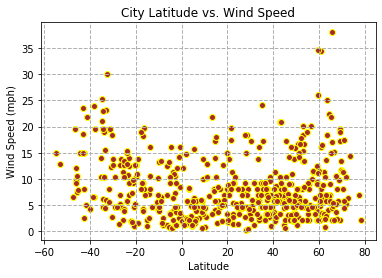

<Figure size 432x288 with 0 Axes>

In [46]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], edgecolor='yellow', color='brown')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('winds.png')